## 背景・目的
* train(valid)をtestの推定分布で同じような打ち切り数になるように後ろ何十行かを切り取ることをしている
* そうするとvalid/trainがtestと同じ用な状況でモデリング・評価ができる
* ただ、trainの後ろの行がなくなる　= 何か重要な情報が抜けるのではないかと思った
* そこで、trainのカットオフはランダムに行っているので、それを複数回やってもいいんじゃない？と思った

## 実験条件1
変動要因|条件|条件詳細
-|-|-
特徴量|固定|4関数
モデル|固定|SVM
trainデータ|変動|230エンジンx使い回し回数、使い回し回数0~19で変化
validデータ|固定|30エンジン

* 使い回しとは、trainの同じエンジンデータを（おそらく）異なるカットオフ数で、違うデータとして扱うこと。
* カットオフ数は、testの推定分布からカーネル密度推定したものからランダムサンプリングする
* 例）エンジンNo.100は、200フライトで死んだとする。そこでランダムサンプルされた打ち切り数が50とすると、No.100のエンジンを50で打ち切る。ここで使いまわし数が3とすると、この打ち切り数のランダムサンプリングを3回行う。したがって、エンジンNo.100から3回打ち切り数の違うサンプルを生成する。

## 実験コード
`src/cha_lab/experiment_reg.py`

## 結果
以下、結果をまとめる

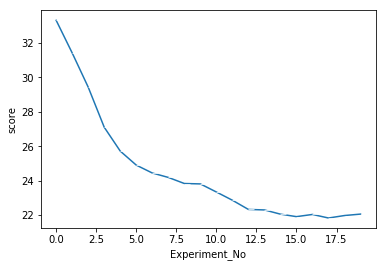

In [24]:
import pandas as pd
import seaborn as sns

result = pd.read_csv('D://isid_phm/data/result.csv')

x = result['Experiment_No'].astype(int)
y = result['score']

sns.lineplot(x, y, marker=True)

In [21]:
result

,Unnamed: 0,Experiment_No,score
0,0,0.0,33.320771
1,1,1.0,31.425496
2,2,2.0,29.437603
3,3,3.0,27.108013
4,4,4.0,25.721449
5,5,5.0,24.906285
6,6,6.0,24.447858
7,7,7.0,24.191209
8,8,8.0,23.837616
9,9,9.0,23.813808


* このExperiment_Noが使い回しの回数で、scoreがValidデータでの内部評価スコアである。
* 10くらいまでどんどんスコアは下がっていっていき、そこからは穏やかに下がる傾向
* これはモデルがSVMなので、モデルに有効そうなサンプルがあればあるほどモデルがよくなると考えられる。SVMは少数の有効なサンプルからモデルを構成する傾向のイメージだから、余計なサンプルが増えても影響が少ない？
* 30,50とかでどうなるかは試してみたいがあまり変化しなさそう